In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
listings = pd.read_csv("listings.csv")

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
selected_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 'availability_365'
]
df = listings[selected_cols].copy()


In [ ]:
df.dropna(inplace=True)
df = df[df['price'] > 0]


X = df.drop('price', axis=1)
y = df['price']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

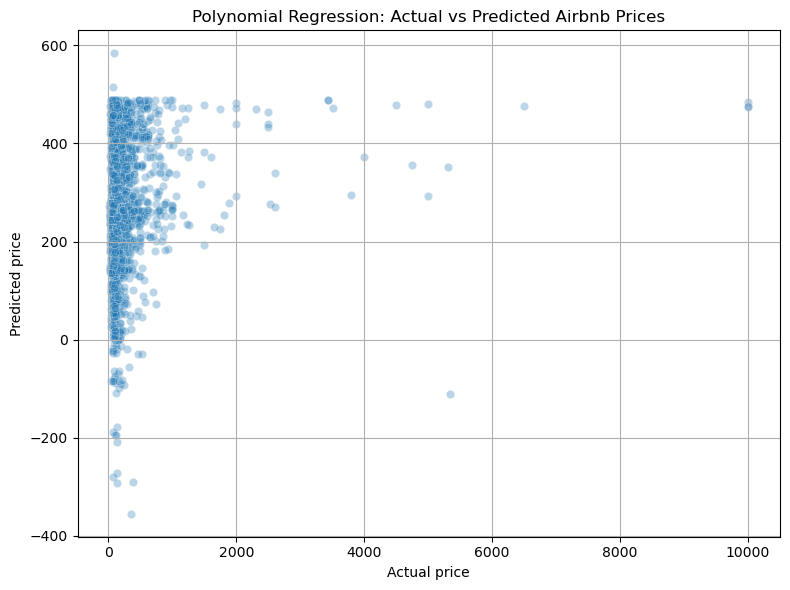

In [12]:


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Polynomial Regression: Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.tight_layout()

In [11]:
(rmse, r2)

(np.float64(538.3511727090034), 0.013751485069726899)

-Polynomial regression with interaction terms was applied to capture nonlinear relationships in Airbnb pricing.

-The model achieved an RMSE of ~$538 and a low R² of ~0.014, indicating limited predictive strength.

-Strong nonlinear patterns were not captured well, suggesting that pricing is influenced by complex or external factors not in the dataset.

-Minimum nights and availability may interact in subtle ways, but not enough to drive strong predictions alone.

-Results reinforce the idea from my Capstone Proposal: quantitative features alone do not fully explain Airbnb price variance.

-Visual scatter plot of actual vs predicted prices shows a wide spread. further feature engineering or model complexity may be needed.